In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

train_df = pd.read_csv("DiabetesTrain.csv", index_col=0)
test_df = pd.read_csv("DiabetesTest.csv", index_col=0)

In [3]:
train_df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
1,10.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,0.0,1.0,1.0
2,10.0,1.0,0.0,1.0,21.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,1.0,1.0
3,4.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0
4,11.0,1.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,1.0,0.0,1.0,1.0
5,10.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9.0,1.0,1.0,1.0,44.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
997,3.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
998,9.0,0.0,1.0,1.0,41.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,30.0,1.0,1.0,1.0,1.0
999,12.0,0.0,1.0,1.0,34.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
x_train = train_df.drop('Diabetes', axis=1)
y_train = train_df['Diabetes']

In [5]:
x_train

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
1,10.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,0.0,1.0
2,10.0,1.0,0.0,1.0,21.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,1.0
3,4.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0
4,11.0,1.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,1.0,0.0,1.0
5,10.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9.0,1.0,1.0,1.0,44.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
997,3.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
998,9.0,0.0,1.0,1.0,41.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,30.0,1.0,1.0,1.0
999,12.0,0.0,1.0,1.0,34.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0


In [6]:
y_train

1       1.0
2       1.0
3       0.0
4       1.0
5       0.0
       ... 
996     0.0
997     0.0
998     1.0
999     0.0
1000    1.0
Name: Diabetes, Length: 1000, dtype: float64

In [7]:
#Linear kernel
svm = SVC(kernel='linear')

In [8]:
#to avoid problems with shuffle while splitting
k_fold = KFold(n_splits = 10, shuffle = False)

In [9]:
# TODO: replace by your own python code
list_scores = cross_val_score(svm, x_train, y_train, cv = k_fold)
cv_acc = list_scores.mean()

In [10]:
cv_acc

0.717

In [11]:
#Polynomial kernel

In [ ]:
param_grid = {'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17]}

svm = SVC(kernel ='poly')

grid_search = GridSearchCV(svm, param_grid, cv =  k_fold)
grid_search.fit(x_train, y_train)
best_degree = grid_search.best_params_['degree']

In [ ]:
best_degree

In [14]:
svm = SVC(kernel='poly', degree=2)

#10-fold cross validation score 
list_scores = cross_val_score(svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()

In [15]:
cv_acc

0.7229999999999999

In [22]:
svm.fit(x_train,y_train)

SVC(C=0.1, degree=2, gamma=0.01, kernel='poly')

In [25]:
svm.n_support_

array([316, 315])

# Tunning without preprocessing

In [26]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [2,3]}

svm = SVC(kernel='poly')


grid_search = GridSearchCV(svm, param_grid, cv = k_fold )
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.01}

In [27]:
svm = SVC(kernel='poly', degree = 2, gamma = 0.01 , C = 0.1)
list_scores = cross_val_score(svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.734


In [29]:
svm.fit(x_train,y_train)
svm.n_support_

array([316, 315])

In [56]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [3]}

rbf_svm = SVC(kernel='rbf')

grid_search = GridSearchCV(rbf_svm, param_grid, cv = k_fold)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 10, 'degree': 3, 'gamma': 0.001}

In [57]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.001)
list_scores = cross_val_score(rbf_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.728


In [58]:
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([314, 318])

In [59]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [3]}

sigmoid_svm = SVC(kernel='sigmoid')

grid_search = GridSearchCV(sigmoid_svm, param_grid, cv = k_fold )
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 10, 'degree': 3, 'gamma': 0.001}

In [66]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.001)

list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.6880000000000001


In [61]:
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([169, 168])

# Tunning with preprocessing

First approach by applying PCA

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [31]:
#PCA is effected by scale so you need to scale the features in the data before applying PCA
scaler  = RobustScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,columns= x_train.columns.values )

pca = PCA(0.95)

reduced_features = pca.fit_transform(x_train_scaled)

print('Shape of txt componentes before PCA: ', x_train_scaled.shape)
print('Shape of txt componentes after PCA: ', reduced_features.shape)  



Shape of txt componentes before PCA:  (1000, 17)
Shape of txt componentes after PCA:  (1000, 10)


In [32]:
#We compute a dataframe with the reduced features and concatenate them to the X1_aux
pca_columns = []
pca_columns = pca_columns + ['pca_comp_%i' % i for i in range(reduced_features.shape[1])]

x_train_reduced = pd.DataFrame(reduced_features, columns = pca_columns)

In [33]:
x_train_reduced

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9
0,0.573716,4.213198,-0.177285,0.141835,0.222644,0.458761,0.437922,-0.718378,-0.114926,-0.568877
1,0.586546,4.220792,-1.604493,-0.247302,0.658812,0.268526,0.470972,-0.471880,0.117514,1.164911
2,-0.976502,0.432652,-0.126991,1.381657,-0.725540,-0.049732,-0.183228,0.017740,0.111644,0.293721
3,-0.591685,1.449771,0.776661,-0.635119,0.730370,-0.218401,-0.263321,-0.161289,-0.285897,0.248416
4,-1.456629,-0.489096,-0.096578,-0.610336,-0.774614,0.221351,-0.362250,-0.398414,-0.312676,-0.097660
...,...,...,...,...,...,...,...,...,...,...
995,-1.268467,-0.126041,1.926662,-0.156721,0.476229,-0.701462,-0.413202,-0.222469,0.074182,-0.206162
996,-1.351219,-0.508290,0.423852,1.124823,-0.458820,0.791783,-0.646185,0.027487,0.680150,-0.531667
997,6.886425,1.861509,0.778329,0.049465,-0.375190,0.257779,-0.047056,-0.660832,-0.514832,0.508691
998,-1.341674,-0.209546,0.846353,-0.992268,-0.767202,0.095407,-0.221782,-0.355861,-0.165058,0.233362


In [34]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [2,3]}


svm = SVC(kernel='poly')

grid_search = GridSearchCV(svm, param_grid, cv = k_fold)
grid_search.fit(x_train_reduced, y_train)
grid_search.best_params_

{'C': 25, 'degree': 3, 'gamma': 0.01}

In [35]:
svm = SVC(kernel='poly', degree = 3, gamma = 0.01 , C = 25)
list_scores = cross_val_score(svm, x_train_reduced, y_train, cv=k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.592


In [37]:
svm.fit(x_train_reduced,y_train)
svm.n_support_

array([420, 416])

In [38]:
#Another preprocessing JUST A PROBE
thresholder = VarianceThreshold(threshold=0)
thresholder.fit(x_train)
thresholder.get_feature_names_out(x_train.columns.values)

array(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'], dtype=object)

In [22]:
#x_train_reduced = x_train.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)
x_train_reduced = train_df.loc[:,['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']]


In [23]:
x_train_reduced

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
1,10.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,0.0,1.0
2,10.0,1.0,0.0,1.0,21.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,1.0
3,4.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0
4,11.0,1.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,1.0,0.0,1.0
5,10.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9.0,1.0,1.0,1.0,44.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
997,3.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
998,9.0,0.0,1.0,1.0,41.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,30.0,1.0,1.0,1.0
999,12.0,0.0,1.0,1.0,34.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0


# PREPROCESSING JUST STANDARD SCALER

In [40]:
scaler  = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,columns= x_train.columns.values )

In [41]:
x_train_scaled

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,0.521014,1.055540,0.955011,0.153432,0.405944,-0.919249,-0.415130,-1.471243,-1.192186,0.512471,-0.217072,1.040040,-0.457700,2.442865,-0.581969,-0.248135,0.955011
1,0.521014,1.055540,-1.047108,0.153432,-1.210289,-0.919249,2.408884,0.679697,-1.192186,-1.951331,-0.217072,1.934313,-0.457700,2.442865,1.718304,-0.248135,0.955011
2,-1.493215,-0.947382,-1.047108,0.153432,0.271258,-0.919249,-0.415130,0.679697,0.838795,0.512471,-0.217072,0.145767,-0.457700,0.131259,-0.581969,-0.248135,-1.047108
3,0.856719,1.055540,0.955011,0.153432,0.675316,1.087845,-0.415130,0.679697,-1.192186,0.512471,-0.217072,1.040040,-0.457700,0.432773,1.718304,-0.248135,0.955011
4,0.521014,-0.947382,0.955011,0.153432,-0.402172,-0.919249,-0.415130,0.679697,0.838795,0.512471,-0.217072,-0.748507,-0.457700,-0.572273,-0.581969,-0.248135,0.955011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.185309,1.055540,0.955011,0.153432,1.887490,1.087845,-0.415130,0.679697,0.838795,-1.951331,-0.217072,0.145767,-0.457700,-0.572273,-0.581969,-0.248135,0.955011
996,-1.828920,-0.947382,0.955011,0.153432,0.405944,-0.919249,-0.415130,-1.471243,0.838795,0.512471,-0.217072,0.145767,-0.457700,-0.572273,-0.581969,-0.248135,-1.047108
997,0.185309,-0.947382,0.955011,0.153432,1.483432,-0.919249,2.408884,0.679697,-1.192186,0.512471,-0.217072,1.934313,2.276468,2.442865,1.718304,4.030059,0.955011
998,1.192423,-0.947382,0.955011,0.153432,0.540630,-0.919249,2.408884,0.679697,0.838795,0.512471,-0.217072,0.145767,-0.457700,-0.572273,-0.581969,-0.248135,0.955011


In [44]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [2,3]}


svm = SVC(kernel='poly')

grid_search = GridSearchCV(svm, param_grid, cv = k_fold)
grid_search.fit(x_train_scaled, y_train)
grid_search.best_params_

{'C': 25, 'degree': 3, 'gamma': 0.01}

In [45]:
svm = SVC(kernel='poly', degree = 3, gamma = 0.01 , C = 25)
list_scores = cross_val_score(svm, x_train_scaled, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.649


In [46]:
svm.fit(x_train_scaled,y_train)
svm.n_support_

array([404, 405])

In [34]:
#Prueba con kernel RBF

In [47]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [3]}

rbf_svm = SVC(kernel='rbf')

grid_search = GridSearchCV(rbf_svm, param_grid, cv = k_fold)
grid_search.fit(x_train_scaled, y_train)
grid_search.best_params_

{'C': 1, 'degree': 3, 'gamma': 0.001}

In [48]:
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.001)
list_scores = cross_val_score(rbf_svm, x_train_scaled, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.7280000000000001


In [54]:
rbf_svm.fit(x_train_scaled,y_train)
rbf_svm.n_support_

array([378, 381])

In [39]:
#Prueba con kernel sigmoid

In [51]:
param_grid = {'C': [0.1,1, 10, 25], 
              'gamma': [0.01,0.001],
             'degree': [3]}

sigmoid_svm = SVC(kernel='sigmoid')

grid_search = GridSearchCV(sigmoid_svm, param_grid, cv = k_fold )
grid_search.fit(x_train_scaled, y_train)
grid_search.best_params_

{'C': 25, 'degree': 3, 'gamma': 0.01}

In [52]:
sigmoid_svm = SVC(kernel='sigmoid', C=25, gamma=0.01)
list_scores = cross_val_score(sigmoid_svm, x_train_scaled, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.7289999999999999


In [55]:
sigmoid_svm.fit(x_train_scaled,y_train)
sigmoid_svm.n_support_

array([294, 291])

# Selecting between best models

In [68]:
#Prepocessing in test set (same as for train set)
x_test = test_df.drop('Diabetes', axis=1)
y_test = test_df['Diabetes']


In [69]:
# train the models with the best hyperparameters
linear_svm = SVC(kernel='linear')
poly_svm = SVC(kernel='poly', degree = 2, gamma = 0.01 , C = 0.1)
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.001)
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.001)

linear_svm.fit(x_train, y_train)
poly_svm.fit(x_train, y_train)
rbf_svm.fit(x_train, y_train)
sigmoid_svm.fit(x_train, y_train)

# evaluate the models on the test set
linear_acc = linear_svm.score(x_test, y_test)
poly_acc = poly_svm.score(x_test, y_test)
rbf_acc = rbf_svm.score(x_test, y_test)
sigmoid_acc = sigmoid_svm.score(x_test, y_test)

# print the test accuracies
print('Linear SVM test accuracy:', linear_acc)
print('Polynomial SVM test accuracy:', poly_acc)
print('RBF SVM test accuracy:', rbf_acc)
print('Sigmoid SVM test accuracy:', sigmoid_acc)

Linear SVM test accuracy: 0.785
Polynomial SVM test accuracy: 0.785
RBF SVM test accuracy: 0.765
Sigmoid SVM test accuracy: 0.745


# Correlation with minimal support vectors

In [77]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=1000)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([533, 465])

In [70]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=1)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([533, 465])

In [71]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.1)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([397, 421])

In [72]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.001)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([314, 318])

In [76]:
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.00001)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([394, 393])

In [93]:
rbf_svm = SVC(kernel='rbf', C=10)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([316, 317])

In [94]:
rbf_svm = SVC(kernel='rbf', C=100)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([297, 305])

In [95]:
rbf_svm = SVC(kernel='rbf', C=200)
rbf_svm.fit(x_train,y_train)
rbf_svm.n_support_

array([298, 302])

In [78]:
poly_svm = SVC(kernel='poly', degree = 2)
svm.fit(x_train,y_train)
svm.n_support_

array([336, 339])

In [79]:
poly_svm = SVC(kernel='poly', degree = 4)
svm.fit(x_train,y_train)
svm.n_support_

array([336, 339])

In [80]:
poly_svm = SVC(kernel='poly', degree = 6)
svm.fit(x_train,y_train)
svm.n_support_

array([336, 339])

In [82]:
poly_svm = SVC(kernel='poly', degree = 100)
svm.fit(x_train,y_train)
svm.n_support_

array([336, 339])

In [87]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.00001)
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([408, 407])

In [88]:
list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.645


In [83]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.001)
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([169, 168])

In [89]:
list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.645


In [84]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.01)
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([465, 465])

In [90]:
list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.645


In [85]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.1)
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([465, 465])

In [91]:
list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.645


In [86]:
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=1)
sigmoid_svm.fit(x_train,y_train)
sigmoid_svm.n_support_

array([465, 465])

In [92]:
list_scores = cross_val_score(sigmoid_svm, x_train, y_train, cv= k_fold)
cv_acc = list_scores.mean()
print(cv_acc)

0.645


# Most important features

In [105]:
# Train a linear SVM on the training set with the best hyperparameters
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Get the absolute values of the coefficients
coef_abs = abs(svm.coef_)
# Get the indices of the features sorted by importance
sorted_idx = coef_abs[0].argsort()[::-1]

# Get the indices of the 4 most important features
top_4_idx = sorted_idx[:4]
print(top_4_idx)
feature_names = x_train.columns.values

# Get the names of the 4 most important features
top_4_features = feature_names[top_4_idx]

print("The 4 most important features are:", top_4_features)

[16  3 11  2]
The 4 most important features are: ['HighBP' 'CholCheck' 'GenHlth' 'HighChol']


Text(0.5, 0, 'Permutation Importance')

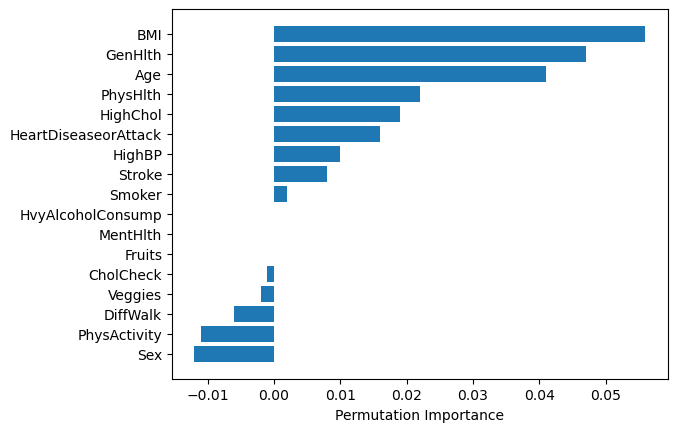

In [101]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc  = SVC(kernel='rbf', C=10, gamma=0.001)
svc.fit(x_train, y_train)

perm_importance = permutation_importance(svc, x_test, y_test)

feature_names = x_train.columns.values
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# FINAL SOLUTIONS

In [ ]:
#Polynomial kernel with metaparameters tunned
svm = SVC(kernel='poly', degree = 2, gamma = 0.01 , C = 0.1)

In [ ]:
#RBF kernel with metaparameters tunned
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.001)

In [ ]:
#Sigmoid kernel with metaparameters tunned
sigmoid_svm = SVC(kernel='sigmoid', C=10, gamma=0.001)